In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests 
from urllib.parse import urlencode 

sns.set_theme(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(25,15)}
        )

C:\Users\Admin\AppData\Local\Temp\ipykernel_8124\2554113093.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Загружаем датафреймы напрямую с Яндекс.Диска

In [3]:
# Пишем фунцкцию для загрузки датафрейма
def read_df(x):
    # используем api 
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
    public_key = x 
    
    # получаем url 
    final_url = base_url + urlencode(dict(public_key=public_key)) 
    response = requests.get(final_url) 
    download_url = response.json()['href'] 
    
    # загружаем файл в df 
    download_response = requests.get(download_url) 
    df = pd.read_csv(download_url) 
    return df

In [4]:
'''
customer_id — позаказный идентификатор пользователя
customer_unique_id — уникальный идентификатор пользователя (аналог номера паспорта)
customer_zip_code_prefix — почтовый индекс пользователя
customer_city — город доставки пользователя
customer_state — штат доставки пользователя
'''
# Таблица с уникальными идентификаторами пользователей
df_users = read_df('https://disk.yandex.ru/d/QXrVDUoQvFhIcg')
df_users

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
'''
order_id — уникальный идентификатор заказа (номер чека)
customer_id — позаказный идентификатор пользователя
order_status — статус заказа
order_purchase_timestamp — время создания заказа
order_approved_at — время подтверждения оплаты заказа
order_delivered_carrier_date — время передачи заказа в логистическую службу
order_delivered_customer_date — время доставки заказа
order_estimated_delivery_date — обещанная дата доставки
'''
# Таблица заказов
df_orders = read_df('https://disk.yandex.ru/d/0zWmh1bYP6REbw')
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
'''
order_id — уникальный идентификатор заказа (номер чека)
order_item_id — идентификатор товара внутри одного заказа
product_id — ид товара (аналог штрихкода)
seller_id — ид производителя товара
shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике
price — цена за единицу товара
freight_value — вес товара
'''
# Товарные позиции, входящие в заказы
df_order_items = read_df('https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg')
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Анализировать данные и преобразовывать их будем по ходу выполнения заданий.

1. Сколько у нас пользователей, которые совершили покупку только один раз?

Чтобы ответить на этот вопрос, необходимо ответить на вопрос, что значит совершить покупку.

Совершил покупку это значит, что покупатель оплатил свой заказ.

Необходимо проанализировать таблицу заказов. Нас интересует колонка order_approved_at с временем подтверждением оплаты.

In [7]:
# Проверим датафрейм на наличие пропущенных значений в колонке order_approved_at
df_orders[df_orders['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [8]:
# Такие значения есть. Сразу выкидываем их из таблицы. Заодно переведём колонку к типу datetime
df_orders_delivered = df_orders[df_orders['order_approved_at'].notna()]
df_orders_delivered.order_approved_at = pd.to_datetime(df_orders_delivered.order_approved_at)
df_orders_delivered

C:\Users\Admin\AppData\Local\Temp\ipykernel_8124\3209497015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_delivered.order_approved_at = pd.to_datetime(df_orders_delivered.order_approved_at)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Как мы можем заметить, у нас есть несколько уникальных статусов заказов:

created —  создан

approved —  подтверждён

invoiced —  выставлен счёт

processing —  в процессе сборки заказа

shipped —  отгружен со склада

delivered —  доставлен пользователю

unavailable —  недоступен

canceled —  отменён

В таблице остались и отменённые заказы и недоступные. Эти заказы тоже уберём.

In [9]:
df_orders_delivered = df_orders_delivered[(df_orders_delivered['order_status'] != "canceled") & (df_orders_delivered['order_status'] != "unavailable")]
df_orders_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Теперь считаем количетсво уникальных пользователей, сделавших заказ только один раз

Чтобы это сделать, обратим внимание на данные пользователей (df_users). Как можно заметить, у пользователя есть показанный индетификатор(customer_id) и уникальный индетификатор (customer_unique_id). Исходя из описания, понимаем, что более точное значение кол-ва пользователей мы получим по уникальному индетификатору. Теперь мерджим таблицы df_users и df_orders_delivered и делаем финальный подсчёт.

In [10]:
df_orders_delivered = df_orders_delivered.merge(df_users, on = 'customer_id')
df_orders_delivered.groupby('customer_unique_id').agg({'order_id': 'count'}).query('order_id == 1').count()

order_id    92087
dtype: int64

Ответ на первое задание:

92087 пользователей совершили покупку только один раз.

In [11]:
df_users.customer_unique_id.nunique()
# Число уникальных пользователей > наш ответ (что логично)

96096

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Разбиваем эту задачу на подзадачи:

1) Выявляем, какие могут быть причины
2) Смотрим ситуацию по месяцам
3) Считаем среднее
4) Выводим график

In [12]:
# Переведём все колонки с указанием времени к типу datetime
# Также наc интересуют только не доставленные заказы, т.е. колонка order_delivered_customer_date должна быть NaN (NaT), а также все статусы заказа, кроме delivered
for i in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    df_orders[i] = pd.to_datetime(df_orders[i])
df_orders_not_delivered = df_orders.query('order_delivered_customer_date == "NaT" and order_status != "delivered"')
df_orders_not_delivered

C:\Users\Admin\AppData\Local\Temp\ipykernel_8124\2330358710.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_orders_not_delivered = df_orders.query('order_delivered_customer_date == "NaT" and order_status != "delivered"')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [13]:
# Создаём копию датафрейма для удобства выявления причин
df_orders_not_delivered_copy = df_orders_not_delivered.copy()

In [14]:
# Получаем 2957 недоставленных заказов. Разобьём по причинам.
for i in ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']:
    for z in df_orders_not_delivered_copy.index:

        # Заказ был отменён покупателем
        if (df_orders_not_delivered_copy.loc[z, 'order_status']) == 'canceled':
            df_orders_not_delivered.loc[z, 'Reason_of_fail_delivery'] = 'Заказ был отменён покупателем'
            df_orders_not_delivered_copy = df_orders_not_delivered_copy.drop(index = z)

        # Заказ не был доставлен, потому что он не был оплачен
        elif pd.isna(df_orders_not_delivered_copy.loc[z, i]) and i == 'order_approved_at':
            df_orders_not_delivered.loc[z, 'Reason_of_fail_delivery'] = 'Заказ не был оплачен и подтверждён'
            df_orders_not_delivered_copy = df_orders_not_delivered_copy.drop(index = z)
            continue

        # Заказ не был доставлен, потому что не было подтверждения, что логистическая служба его приняла
        elif pd.isna(df_orders_not_delivered_copy.loc[z, i]) and i == 'order_delivered_carrier_date':

            #  Заказ не был доставлен, потому что не был собран для передачи в логистическую службу
            if df_orders_not_delivered_copy.loc[z, 'order_status'] == 'invoiced' or df_orders_not_delivered_copy.loc[z, 'order_status'] == 'approved':
                df_orders_not_delivered.loc[z, 'Reason_of_fail_delivery'] = 'Заказ не был собран для передачи в логистическую службу'

            # Заказ не был доставлен, потому что не был отгружен со склада
            elif df_orders_not_delivered_copy.loc[z, 'order_status'] == 'processing':
                df_orders_not_delivered.loc[z, 'Reason_of_fail_delivery'] = 'Заказ не был передан в логистическую службу по причине того, что не был отгружен со склада'

            # Заказ не был доставлен по непонятной причине
            elif df_orders_not_delivered_copy.loc[z, 'order_status'] == 'unavailable':
                df_orders_not_delivered.loc[z, 'Reason_of_fail_delivery'] = 'Заказ не был передан в логистическую службу по неизвестной причине'

            df_orders_not_delivered_copy = df_orders_not_delivered_copy.drop(index = z)
            continue

        # Заказ не был доставлен, потому что логистическая служюа не подтвердила его даоставку
        elif pd.isna(df_orders_not_delivered_copy.loc[z, i]) and i == 'order_delivered_customer_date':
            df_orders_not_delivered.loc[z, 'Reason_of_fail_delivery'] = 'Логистическася служба не доставила заказ покупателю'
            df_orders_not_delivered_copy = df_orders_not_delivered_copy.drop(index = z)
            continue

df_orders_not_delivered

C:\Users\Admin\AppData\Local\Temp\ipykernel_8124\1016535888.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_not_delivered.loc[z, 'Reason_of_fail_delivery'] = 'Заказ был отменён покупателем'


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Reason_of_fail_delivery
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,Заказ не был собран для передачи в логистическ...
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,Логистическася служба не доставила заказ покуп...
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,Заказ не был собран для передачи в логистическ...
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,Заказ не был передан в логистическую службу по...
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,Логистическася служба не доставила заказ покуп...
...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,Заказ был отменён покупателем
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,Заказ не был передан в логистическую службу по...
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,Заказ был отменён покупателем
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,Заказ не был передан в логистическую службу по...


In [15]:
# Перечнь причин и их кол-во (1-ая подзадача выполнена)
df_orders_not_delivered.groupby('Reason_of_fail_delivery').agg({'order_id': 'count'})

,order_id
Reason_of_fail_delivery,
Заказ был отменён покупателем,619
Заказ не был оплачен и подтверждён,5
Заказ не был передан в логистическую службу по неизвестной причине,609
"Заказ не был передан в логистическую службу по причине того, что не был отгружен со склада",301
Заказ не был собран для передачи в логистическую службу,316
Логистическася служба не доставила заказ покупателю,1107


In [16]:
# Выведем кол-во заказов, которые не доставляются, по месяцам
# Ориентироваться необходимо по колонке order_estimated_delivery_date - обещанная дата доставки
# Необходимо преобразовать колонку к месяцу
df_orders_not_delivered.order_estimated_delivery_date = df_orders_not_delivered.order_estimated_delivery_date.dt.to_period('M')
df_orders_not_delivered

C:\Users\Admin\AppData\Local\Temp\ipykernel_8124\3752100737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_not_delivered.order_estimated_delivery_date = df_orders_not_delivered.order_estimated_delivery_date.dt.to_period('M')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Reason_of_fail_delivery
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05,Заказ не был собран для передачи в логистическ...
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06,Логистическася служба не доставила заказ покуп...
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08,Заказ не был собран для передачи в логистическ...
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10,Заказ не был передан в логистическую службу по...
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02,Логистическася служба не доставила заказ покуп...
...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10,Заказ был отменён покупателем
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02,Заказ не был передан в логистическую службу по...
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09,Заказ был отменён покупателем
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09,Заказ не был передан в логистическую службу по...


In [17]:
# Выполняем 2-ю подзадачу
df_orders_not_delivered.groupby('order_estimated_delivery_date').agg({'Reason_of_fail_delivery': 'count'})

,Reason_of_fail_delivery
order_estimated_delivery_date,
2016-09,1
2016-10,4
2016-11,25
2016-12,27
2017-02,12
2017-03,193
2017-04,104
2017-05,131
2017-06,143


In [18]:
# Выполняем 3-ю подзадачу
round(df_orders_not_delivered.groupby('order_estimated_delivery_date').agg({'Reason_of_fail_delivery': 'count'}).mean())

Reason_of_fail_delivery    114.0
dtype: float64

In [19]:
# Выполняем 4-ю подзадачу
for_graph = df_orders_not_delivered.groupby(['order_estimated_delivery_date', 'Reason_of_fail_delivery'], as_index = False).agg({'order_id': 'count'}).set_index('order_estimated_delivery_date')
for_graph.index = for_graph.index.astype(str)
for_graph

,Reason_of_fail_delivery,order_id
order_estimated_delivery_date,,
2016-09,Заказ был отменён покупателем,1
2016-10,Заказ был отменён покупателем,3
2016-10,Логистическася служба не доставила заказ покуп...,1
2016-11,Заказ был отменён покупателем,10
2016-11,Заказ не был передан в логистическую службу по...,5
...,...,...
2018-08,Логистическася служба не доставила заказ покуп...,90
2018-09,Заказ был отменён покупателем,49
2018-09,Логистическася служба не доставила заказ покуп...,4


C:\Users\Admin\AppData\Local\Temp\ipykernel_8124\3771125338.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(), rotation = 90);


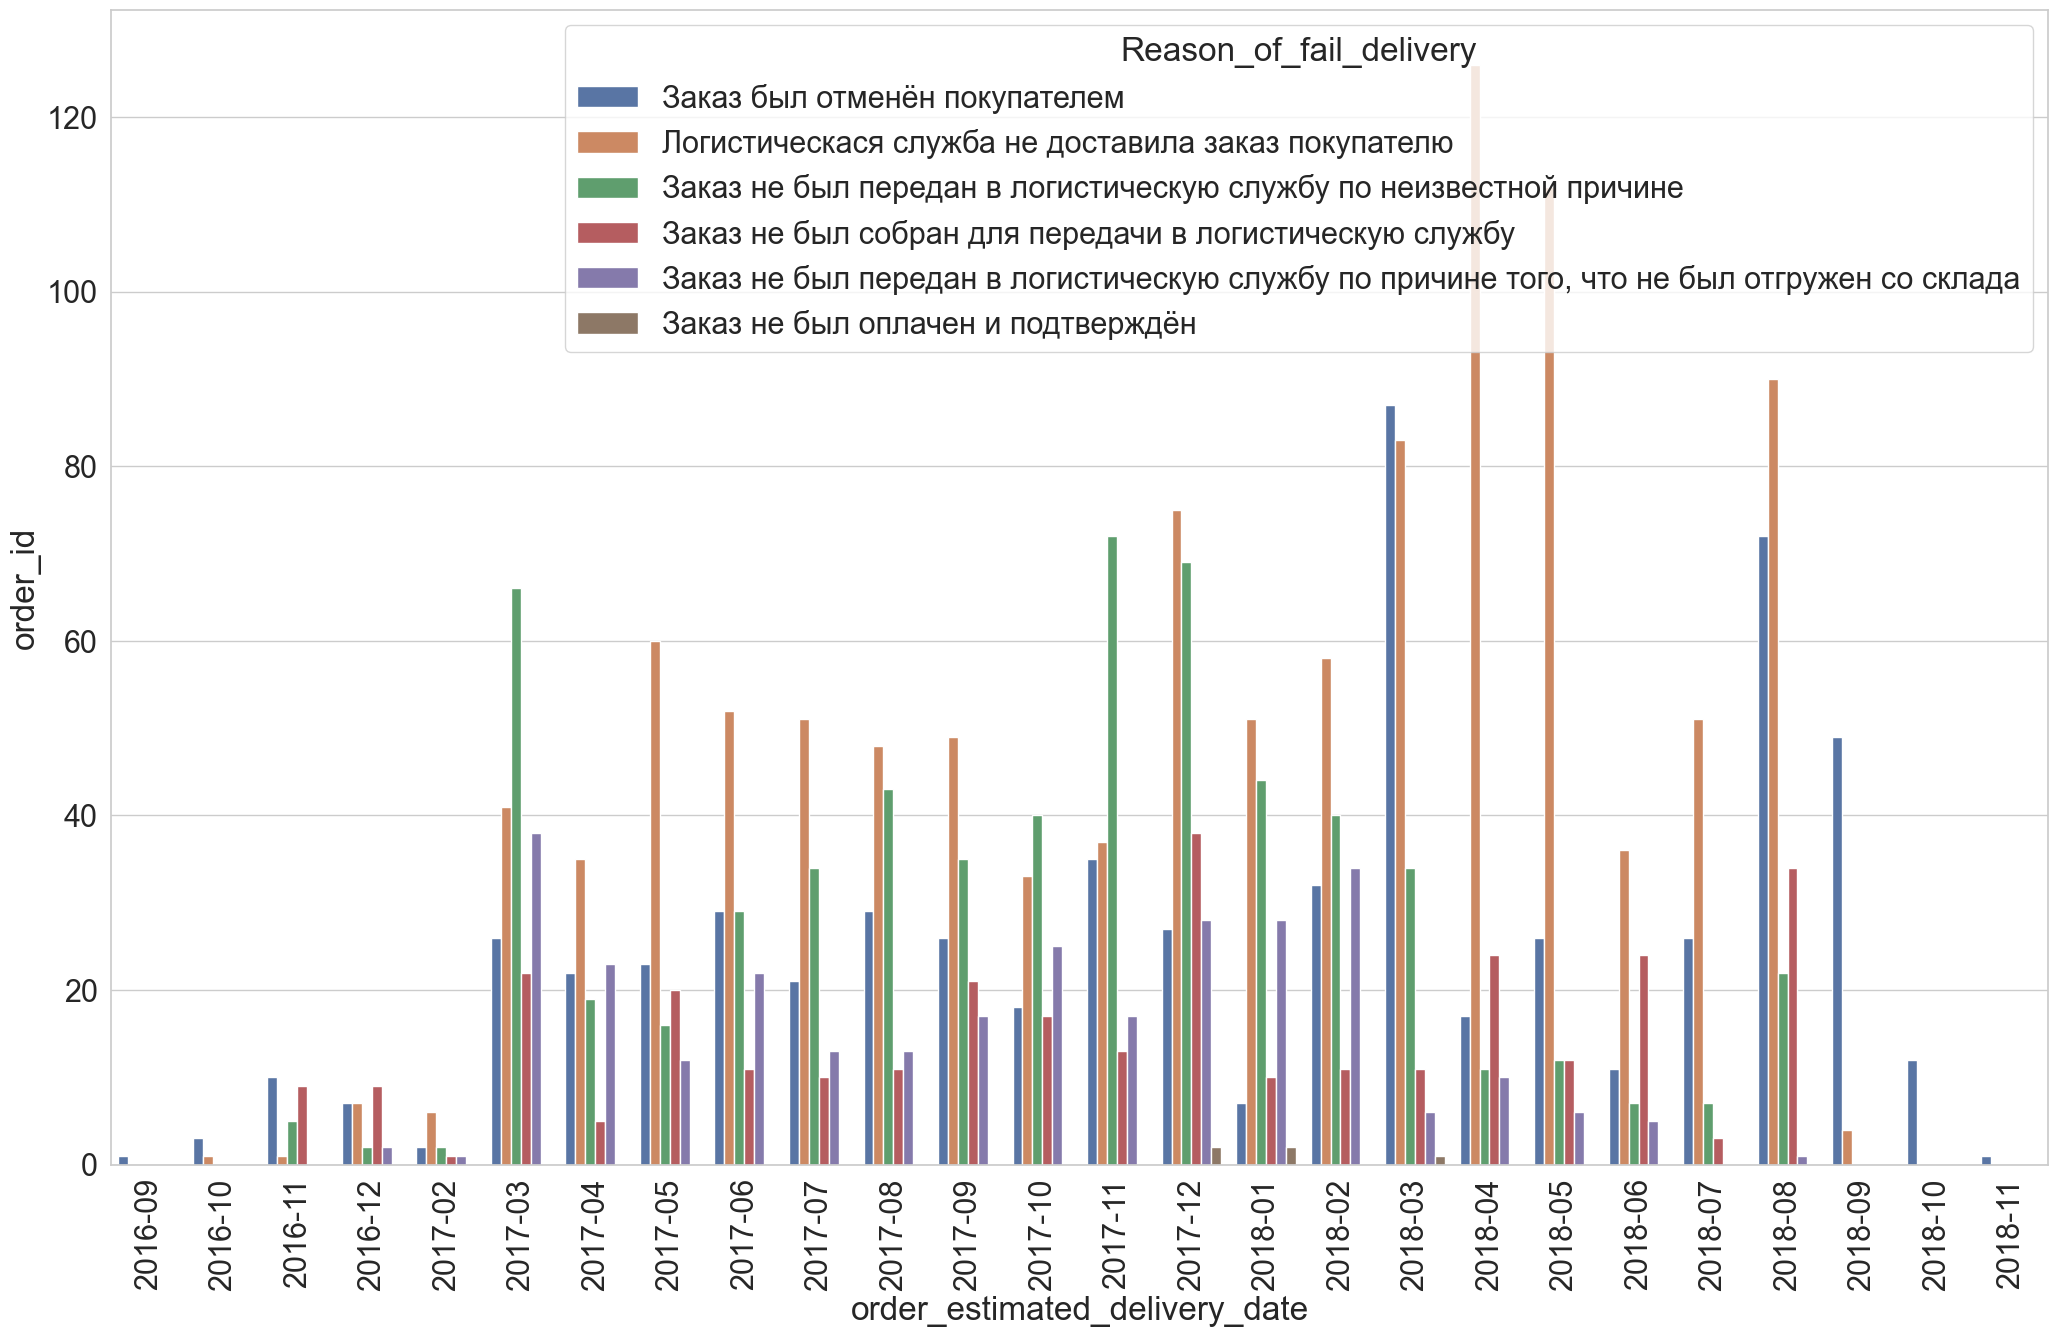

In [20]:
graph = sns.barplot(data = for_graph, x = for_graph.index, y = 'order_id', hue = 'Reason_of_fail_delivery')
graph.set_xticklabels(graph.get_xticklabels(), rotation = 90);

Ответ на второе задание:



В месяц в среднем по разным причинам не доставляется 114 заказов. Детализация по причинам выведена выше вместе с графиком

3. По каждому товару определить, в какой день недели товар чаще всего покупается

Подзадачи:

1) Смёрджить таблицу заказов и таблицу товаров, входящих в заказ (вывести нужные нам столбцы (order_id, product_id, order_approved_at))
2) Перевести колонку order_approved_at ко дням недели
3) Выполнить группировку с сортировкой

In [21]:
df_order_items.product_id.nunique()

32951

In [22]:
# Выполняем 1-ую подхадачу
# Взяли именно колонку времени подтверждения оплаты (order_approved_at), потому что в задании именно "чаще всего покупается", а не "чаще всего заказывается"
df_product_id_purchased = df_order_items[['order_id', 'product_id']].merge(df_orders[['order_id', 'order_approved_at']], on = 'order_id')
df_product_id_purchased

,order_id,product_id,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-04-26 11:05:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-14 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-08 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-04 14:10:13
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,2018-04-25 04:11:01
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,2018-07-17 04:31:48
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,2017-10-24 17:14:25
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2017-08-15 00:04:32


In [23]:
# Количество уникальных товаров, которые были заказаны, но не были оплачены
df_product_id_purchased[df_product_id_purchased['product_id'].isin(df_product_id_purchased.query('order_approved_at == "NaT"').product_id)].groupby('product_id').count().query('order_id == 1').shape[0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_8124\1716013080.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_product_id_purchased[df_product_id_purchased['product_id'].isin(df_product_id_purchased.query('order_approved_at == "NaT"').product_id)].groupby('product_id').count().query('order_id == 1').shape[0]


3

In [24]:
# Из получившейся таблицы убираем неоплаченные заказы (order_approved_at == NaT)
df_product_id_purchased = df_product_id_purchased.dropna(subset = ['order_approved_at'])
df_product_id_purchased.product_id.nunique()
# 32951 - 3 = 32948 (сходится)

32948

In [25]:
# Выполняем 2-ю подзадачу
df_product_id_purchased.order_approved_at = df_product_id_purchased.order_approved_at.dt.day_name()
df_product_id_purchased

C:\Users\Admin\AppData\Local\Temp\ipykernel_8124\722959697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product_id_purchased.order_approved_at = df_product_id_purchased.order_approved_at.dt.day_name()


,order_id,product_id,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,Wednesday
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,Sunday
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,Saturday
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,Wednesday
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,Tuesday
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,Tuesday
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,Tuesday


In [26]:
# Выполняем 3-ю подзадачу
df_product_id_purchased = df_product_id_purchased.groupby(['product_id', 'order_approved_at'], as_index = False).agg({'order_id': 'count'}).sort_values('order_id', ascending = False)
df_product_id_purchased.groupby(['product_id'], as_index = False).agg({'order_id': 'max'}).sort_values('order_id', ascending = False).merge(df_product_id_purchased, how = 'left').drop_duplicates(subset = ['product_id', 'order_id'])[['product_id', 'order_approved_at']]


,product_id,order_approved_at
0,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday
1,53b36df67ebb7c41585e8d54d6772e08,Tuesday
2,422879e10f46682990de24d770e7f83d,Tuesday
3,99a4788cb24856965c36a24e339b6058,Tuesday
4,368c6c730842d78016ad823897a372db,Thursday
...,...,...
42619,62874f62bbdeec35f7cd827b1716c47e,Wednesday
42620,628677036f276f6c0792cded8e9211ee,Thursday
42622,6281a79f478d260d81da138f7e03c0bb,Friday
42624,627dce1ab24323cb7ac147cad5ac0b8c,Friday


Выше получаем таблицу - ответ на 3-е задание. Например товар со штрихкодом aca2eb7d00ea1a7b8ebd4e68314663af больше всего продавался во вторник

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [27]:
# Делаем предобработку для выполнения задания
# Мёрджим исходные датафреймы и оставляем нужные колонки
df_for_task_4 = df_users.merge(df_orders, on = 'customer_id')[['customer_id', 'order_id', 'customer_unique_id', 'order_approved_at']]
df_for_task_4 = df_for_task_4[df_for_task_4['order_approved_at'].notna()]
df_for_task_4 = df_for_task_4.merge(df_order_items, on = 'order_id')[['customer_unique_id', 'order_id', 'order_approved_at']]
df_for_task_4.order_approved_at = pd.to_datetime(df_for_task_4.order_approved_at)

# Сделаем колонки с месяцами и неделями
df_for_task_4['month'] = df_for_task_4.order_approved_at.dt.to_period('M')
df_for_task_4['week'] = df_for_task_4.order_approved_at.dt.to_period('W')

df_for_task_4

,customer_unique_id,order_id,order_approved_at,month,week
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,2017-05,2017-05-15/2017-05-21
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,2018-01,2018-01-08/2018-01-14
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,2018-05,2018-05-14/2018-05-20
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,2018-03,2018-03-12/2018-03-18
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,2018-07,2018-07-23/2018-07-29
...,...,...,...,...,...
112630,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 16:08:45,2018-04,2018-04-02/2018-04-08
112631,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:35:12,2018-04,2018-04-02/2018-04-08
112632,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:30:03,2018-04,2018-04-02/2018-04-08
112633,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:31:20,2017-11,2017-10-30/2017-11-05


Для того, чтобы ответить на вопрос необходимо, для каждого пользователя посчитать количество покупок за месяц и поделить на количество недель в месяце(weeks_in_month), предварительно провести группировку по пользователям и месяцам

In [28]:
df_for_task_4 = df_for_task_4.groupby(['customer_unique_id', 'month'], as_index = False).agg({'order_id': 'count'})

# Создадим колонку, в которой указывается кол-во дней в месяце
df_for_task_4['days_in_month'] = df_for_task_4.month.dt.days_in_month

# Создадим колонку, в которой указывается, сколько недель в месяце
df_for_task_4['weeks_in_month'] = np.array(df_for_task_4['days_in_month'] * 100 / 7 , dtype = int)
df_for_task_4['weeks_in_month'] = df_for_task_4['weeks_in_month'] / 100

df_for_task_4['mean'] = df_for_task_4['order_id'] / df_for_task_4['weeks_in_month']

df_for_task_4[['customer_unique_id', 'month', 'mean']]

,customer_unique_id,month,mean
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.226244
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.226244
2,0000f46a3911fa3c0805444483337064,2017-03,0.226244
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.226244
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233645
...,...,...,...
97296,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,0.467290
97297,fffea47cd6d3cc0a88bd621562a9d061,2017-12,0.226244
97298,ffff371b4d645b6ecea244b27531430a,2017-02,0.250000
97299,ffff5962728ec6157033ef9805bacc48,2018-05,0.226244


Выше получаем таблицу - ответ на 4-е задание. Например пользователь 0000366f3b9a7992bf8c76cfdf3221e2 в мае 2018го года в среднем в неделю делал 0.226 покупок.

Стоит упомянуть, что в исходных данных присутствуют неполные месяцы - таблица начинается с середины какого-либо месяца. Этот нюанс в расчёт здесь не взят.

5.1. Выполните когортный анализ пользователей.

5.2. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. Для визуализации когортной таблицы рекомендуем использовать пример из 8-го урока python, раздел “Стильный урок”, степ 5. (15 баллов)

Что такое Retention? Retention — это метрика, отвечающая на вопрос, сколько людей вернулись в месяц Х.

Значит когортный анализ Retention будет помесячный. Значение, которое нас интересует, является кол-во пользователей которые создали свой заказ (order_purchase_timestamp != NaN) и которые его не отменяли (order_status != 'canceled')

In [29]:
# Начальная предобработка
for_cogort = df_users.merge(df_orders[(df_orders['order_approved_at'].notna()) & (df_orders['order_status'] != "canceled") & (df_orders['order_status'] != "unavailable")], on = 'customer_id')[['customer_unique_id', 'order_purchase_timestamp']]

# Когортный анализ будет помесячный, поэтому переведём и выведем месяц, когда пользователь сделал заказ
for_cogort.order_purchase_timestamp = pd.to_datetime(for_cogort.order_purchase_timestamp)
for_cogort.order_purchase_timestamp = for_cogort.order_purchase_timestamp.to_numpy().astype('datetime64[M]')

for_cogort

,customer_unique_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,2017-05-01
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-01
3,259dac757896d24d7702b9acbbff3f3c,2018-03-01
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-01
...,...,...
98183,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-01
98184,d52a67c98be1cf6a5c84435bd38d095d,2018-04-01
98185,e9f50caf99f032f0bf3c55141f019d99,2018-04-01
98186,73c2643a0a458b49f58cea58833b192e,2017-11-01


In [30]:
# Для каждого пользователя найдём  дату его первого заказа (это будут наши когорты - строки)
df_for_task_5 = for_cogort.groupby('customer_unique_id', as_index = False).agg({'order_purchase_timestamp': 'min'}).sort_values('order_purchase_timestamp') \
    .rename(columns = {'order_purchase_timestamp': 'first_order'})

df_for_task_5

,customer_unique_id,first_order
48742,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-01
68293,b7d76e111c89f7ebf14761390f0f7d17,2016-09-01
41494,6f90ec5150be36c4475835b5941ab56f,2016-10-01
70785,be8375783b7439dd7ef30b89fb46188b,2016-10-01
34396,5c418344883a1f8617cb5577648adb4a,2016-10-01
...,...,...
49707,85cc592cd0bc4fda8effa4b10ca8eeb7,2018-08-01
49708,85cc88d8328dc1bd3d745b1ee2d08cb5,2018-08-01
24532,41ee175c985a80197337531155581467,2018-08-01
24530,41edba3f31cd6ab2fe7bdb769422fd2b,2018-08-01


In [31]:
# Смёрджим две получившиеся таблицы
template = df_for_task_5.merge(for_cogort, on = 'customer_unique_id')

# Для каждого пользователя поссчитаем кол-во месяцев, прошедших с его первого заказа (это будут наши колонки)
template['diff_month'] = 12 * (template.order_purchase_timestamp.dt.year - template.first_order.dt.year) + (template.order_purchase_timestamp.dt.month - template.first_order.dt.month)

template

,customer_unique_id,first_order,order_purchase_timestamp,diff_month
0,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-01,2016-09-01,0
1,b7d76e111c89f7ebf14761390f0f7d17,2016-09-01,2016-09-01,0
2,6f90ec5150be36c4475835b5941ab56f,2016-10-01,2016-10-01,0
3,be8375783b7439dd7ef30b89fb46188b,2016-10-01,2016-10-01,0
4,5c418344883a1f8617cb5577648adb4a,2016-10-01,2016-10-01,0
...,...,...,...,...
98183,85cc592cd0bc4fda8effa4b10ca8eeb7,2018-08-01,2018-08-01,0
98184,85cc88d8328dc1bd3d745b1ee2d08cb5,2018-08-01,2018-08-01,0
98185,41ee175c985a80197337531155581467,2018-08-01,2018-08-01,0
98186,41edba3f31cd6ab2fe7bdb769422fd2b,2018-08-01,2018-08-01,0


In [32]:
# Для каждой когорты считаем кол-во пользователей, совершивших первый заказ, чтобы в конце посчитать ответ в процентах
cogort_start_size = template.groupby('first_order', as_index = False).agg({'customer_unique_id': 'nunique'}).rename(columns = {'customer_unique_id': 'count_of_users_cohort'})
cogort_start_size

,first_order,count_of_users_cohort
0,2016-09-01,2
1,2016-10-01,290
2,2016-12-01,1
3,2017-01-01,750
4,2017-02-01,1678
5,2017-03-01,2571
6,2017-04-01,2325
7,2017-05-01,3541
8,2017-06-01,3102
9,2017-07-01,3822


Столбцами в нашем когортном анализе будет количетсво месяцев, прошедших с момента первого заказа пользователей.

В задании требуется в период с января по декабрь выявить когорту с самым высоким retention на 3-й месяц. В данных видим, что полный год есть только 2017. Значит возьмём его.

In [33]:
# Когортый анализ в табличном виде
template = template.query('first_order > "2016-12-31" and first_order < "2018-01-01"').groupby(['first_order', 'diff_month'], as_index = False).agg({'customer_unique_id': 'nunique'})

# Смёрджим таблицы, чтоб в последствии посчитать значения в процентах
template = template.merge(cogort_start_size, on = 'first_order')

template

,first_order,diff_month,customer_unique_id,count_of_users_cohort
0,2017-01-01,0,750,750
1,2017-01-01,1,3,750
2,2017-01-01,2,2,750
3,2017-01-01,3,1,750
4,2017-01-01,4,3,750
...,...,...,...,...
166,2017-12-01,4,14,5437
167,2017-12-01,5,11,5437
168,2017-12-01,6,9,5437
169,2017-12-01,7,1,5437


<Axes: xlabel='diff_month', ylabel='customer_unique_id'>

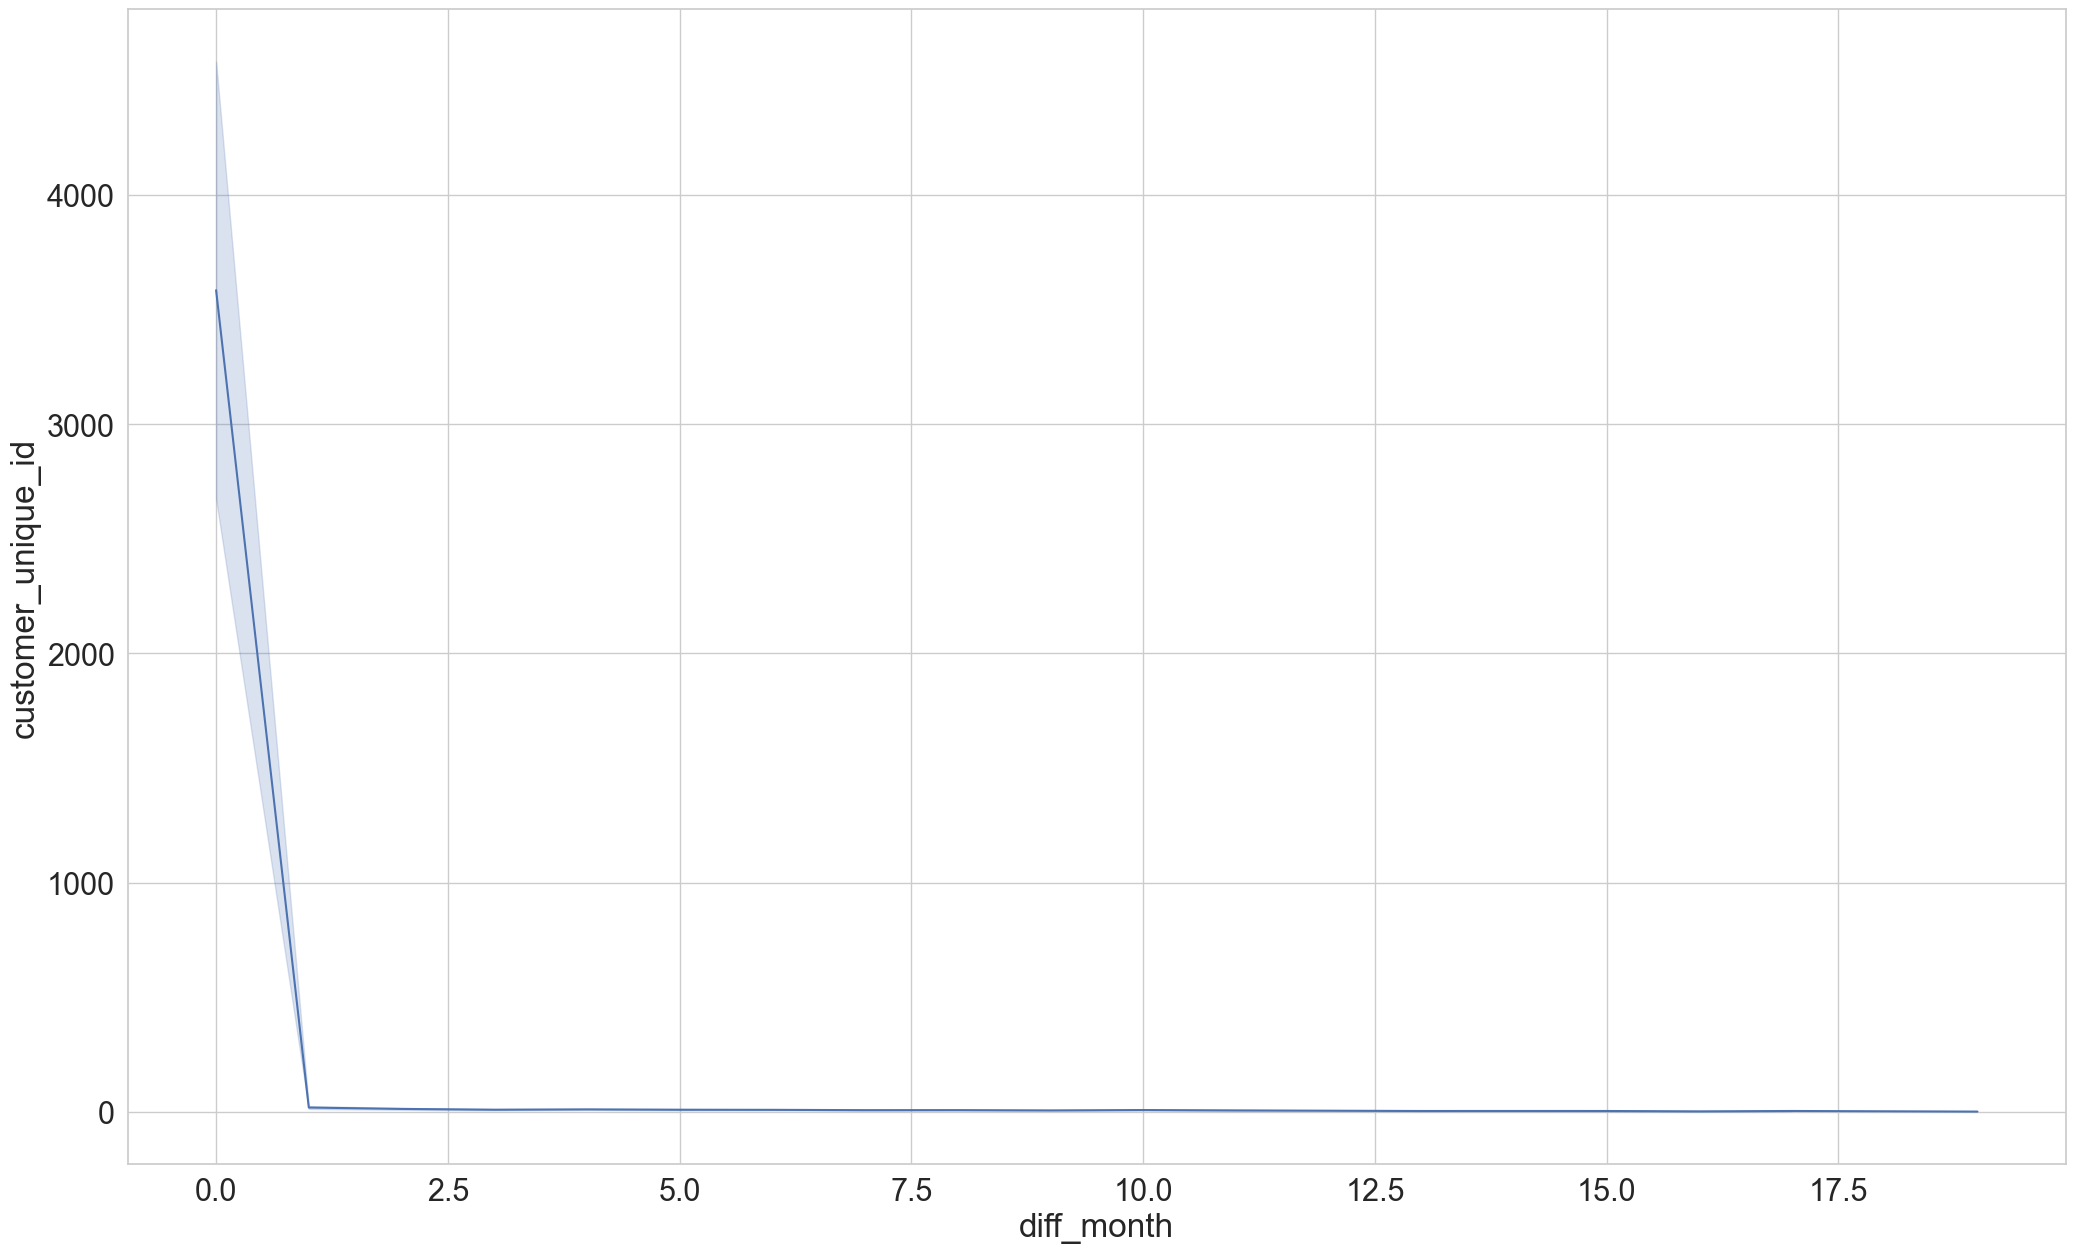

In [34]:
# График Retention
sns.lineplot(template, x = 'diff_month', y = 'customer_unique_id')

In [35]:
# Когортный анализ в виде сводной таблицы со значениями кол-ва пользователей
template.pivot_table(index = 'first_order', columns = 'diff_month', values = 'customer_unique_id')

diff_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_order,,,,,,,,,,,,,,,,,,,
2017-01-01,750.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02-01,1678.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN
2017-03-01,2571.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN
2017-04-01,2325.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,NaN
2017-05-01,3541.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,9.0,12.0,9.0,1.0,7.0,8.0,NaN,NaN,NaN
2017-06-01,3102.0,14.0,11.0,12.0,8.0,12.0,11.0,7.0,4.0,7.0,10.0,10.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN
2017-07-01,3822.0,20.0,13.0,9.0,11.0,8.0,12.0,4.0,7.0,10.0,8.0,11.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2017-08-01,4130.0,28.0,14.0,11.0,15.0,22.0,12.0,11.0,6.0,6.0,10.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,4075.0,28.0,22.0,12.0,18.0,9.0,9.0,10.0,12.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Когортный анализ в виде сводной таблицы со значениями процентов пользователей
template['customer_unique_id'] = round((template['customer_unique_id'] / template['count_of_users_cohort']) * 100, 2)
template = template.pivot_table(index = 'first_order', columns = 'diff_month', values = 'customer_unique_id')
template

diff_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_order,,,,,,,,,,,,,,,,,,,
2017-01-01,100.0,0.40,0.27,0.13,0.40,0.13,0.40,0.13,0.13,NaN,0.40,0.13,0.67,0.40,0.13,0.13,0.27,0.40,0.13
2017-02-01,100.0,0.24,0.30,0.12,0.42,0.12,0.24,0.18,0.06,0.18,0.12,0.30,0.12,0.18,0.12,0.06,0.06,0.24,NaN
2017-03-01,100.0,0.51,0.35,0.39,0.35,0.16,0.16,0.31,0.35,0.08,0.39,0.12,0.23,0.12,0.16,0.23,0.08,0.16,NaN
2017-04-01,100.0,0.60,0.22,0.17,0.30,0.26,0.34,0.30,0.30,0.17,0.26,0.09,0.09,0.04,0.09,0.09,0.13,NaN,NaN
2017-05-01,100.0,0.48,0.48,0.40,0.31,0.34,0.42,0.14,0.25,0.25,0.25,0.34,0.25,0.03,0.20,0.23,NaN,NaN,NaN
2017-06-01,100.0,0.45,0.35,0.39,0.26,0.39,0.35,0.23,0.13,0.23,0.32,0.32,0.16,0.13,0.19,NaN,NaN,NaN,NaN
2017-07-01,100.0,0.52,0.34,0.24,0.29,0.21,0.31,0.10,0.18,0.26,0.21,0.29,0.13,0.26,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,0.68,0.34,0.27,0.36,0.53,0.29,0.27,0.15,0.15,0.24,0.19,0.12,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,0.69,0.54,0.29,0.44,0.22,0.22,0.25,0.29,0.17,0.27,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
template.style.background_gradient(cmap='viridis').highlight_null('white').format('{:.2f}' + '%', na_rep="")

diff_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_order,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,100.00%,0.40%,0.27%,0.13%,0.40%,0.13%,0.40%,0.13%,0.13%,,0.40%,0.13%,0.67%,0.40%,0.13%,0.13%,0.27%,0.40%,0.13%
2017-02-01 00:00:00,100.00%,0.24%,0.30%,0.12%,0.42%,0.12%,0.24%,0.18%,0.06%,0.18%,0.12%,0.30%,0.12%,0.18%,0.12%,0.06%,0.06%,0.24%,
2017-03-01 00:00:00,100.00%,0.51%,0.35%,0.39%,0.35%,0.16%,0.16%,0.31%,0.35%,0.08%,0.39%,0.12%,0.23%,0.12%,0.16%,0.23%,0.08%,0.16%,
2017-04-01 00:00:00,100.00%,0.60%,0.22%,0.17%,0.30%,0.26%,0.34%,0.30%,0.30%,0.17%,0.26%,0.09%,0.09%,0.04%,0.09%,0.09%,0.13%,,
2017-05-01 00:00:00,100.00%,0.48%,0.48%,0.40%,0.31%,0.34%,0.42%,0.14%,0.25%,0.25%,0.25%,0.34%,0.25%,0.03%,0.20%,0.23%,,,
2017-06-01 00:00:00,100.00%,0.45%,0.35%,0.39%,0.26%,0.39%,0.35%,0.23%,0.13%,0.23%,0.32%,0.32%,0.16%,0.13%,0.19%,,,,
2017-07-01 00:00:00,100.00%,0.52%,0.34%,0.24%,0.29%,0.21%,0.31%,0.10%,0.18%,0.26%,0.21%,0.29%,0.13%,0.26%,,,,,
2017-08-01 00:00:00,100.00%,0.68%,0.34%,0.27%,0.36%,0.53%,0.29%,0.27%,0.15%,0.15%,0.24%,0.19%,0.12%,,,,,,
2017-09-01 00:00:00,100.00%,0.69%,0.54%,0.29%,0.44%,0.22%,0.22%,0.25%,0.29%,0.17%,0.27%,0.07%,,,,,,,


Ответ на 5ое задание: в период с января по декабрь с самым высоким retention на 3-й месяц является когорта 2017-09-01 (0.54%).

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [38]:
# Сделаем начальную предобработку
df_for_task_6 = df_orders.merge(df_users, on = 'customer_id')[['customer_unique_id', 'order_status', 'order_approved_at', 'order_id']]

# Колонку с датой покупки переводим в юолее удобный вид
df_for_task_6['order_approved_at'] = df_for_task_6.order_approved_at.dt.strftime('%Y-%m-%d')
df_for_task_6['order_approved_at'] = pd.to_datetime(df_for_task_6.order_approved_at)

# Уберём заказы, которые не были оплачены, которые были отменены и о которых нет информации
df_for_task_6 = df_for_task_6[(df_for_task_6['order_approved_at'].notna()) & (df_for_task_6['order_status'] != "canceled") & (df_for_task_6['order_status'] != "unavailable")]


df_for_task_6

,customer_unique_id,order_status,order_approved_at,order_id
0,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7
1,af07308b275d755c9edb36a90c618231,delivered,2018-07-26,53cdb2fc8bc7dce0b6741e2150273451
2,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08,47770eb9100c2d0c44946d9cf07ec65d
3,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18,949d5b44dbf5de918fe9c16f97b45f8a
4,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13,ad21c59c0840e6cb83a9ceb5573f8159
...,...,...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09,9c5dedf39a927c1b2549525ed64a053c
99437,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06,63943bddc261676b46f01ca7ac2f7bd8
99438,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27,83c1379a015df1e13d02aae0204711ab
99439,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08,11c177c8e97725db2631073c19f07b62


In [39]:
# Считаем для кажждого заказа количество товаров и общую сумму
df_order_desc = df_order_items.groupby('order_id').agg({'price': 'sum'}).rename(columns = {'price': 'total_price_of_order'})
df_order_desc

,total_price_of_order
order_id,
00010242fe8c5a6d1ba2dd792cb16214,58.90
00018f77f2f0320c557190d7a144bdd3,239.90
000229ec398224ef6ca0657da4fc703e,199.00
00024acbcdf0a6daa1e931b038114c75,12.99
00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...
fffc94f6ce00a00581880bf54a75a037,299.99
fffcd46ef2263f404302a634eb57f7eb,350.00
fffce4705a9662cd70adb13d4a31832d,99.90


In [40]:
# Мёрджим две получившиеся таблицы
df_for_task_6 = df_for_task_6.merge(df_order_desc, on = 'order_id').drop(['order_status'], axis = 1)
df_for_task_6

,customer_unique_id,order_approved_at,order_id,total_price_of_order
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,29.99
1,af07308b275d755c9edb36a90c618231,2018-07-26,53cdb2fc8bc7dce0b6741e2150273451,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,47770eb9100c2d0c44946d9cf07ec65d,159.90
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18,949d5b44dbf5de918fe9c16f97b45f8a,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13,ad21c59c0840e6cb83a9ceb5573f8159,19.90
...,...,...,...,...
98180,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09,9c5dedf39a927c1b2549525ed64a053c,72.00
98181,da62f9e57a76d978d02ab5362c509660,2018-02-06,63943bddc261676b46f01ca7ac2f7bd8,174.90
98182,737520a9aad80b3fbbdad19b66b37b30,2017-08-27,83c1379a015df1e13d02aae0204711ab,205.99
98183,5097a5312c8b157bb7be58ae360ef43c,2018-01-08,11c177c8e97725db2631073c19f07b62,359.98


In [41]:
# Теперь для каждого пользователя посчитаем дату его последнего заказа, суммарное количетсво товаров за все заказы и общая сумма за все заказы
df_for_task_6 = df_for_task_6.groupby('customer_unique_id', as_index = False).agg({'order_approved_at': 'max', 'order_id': 'count', 'total_price_of_order': 'sum'}).rename(columns = {'order_id': 'count_of_orders'})
df_for_task_6

,customer_unique_id,order_approved_at,count_of_orders,total_price_of_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00
...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,1,1570.00
94966,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,1,64.89
94967,ffff371b4d645b6ecea244b27531430a,2017-02-07,1,89.90
94968,ffff5962728ec6157033ef9805bacc48,2018-05-02,1,115.00


R - время от последней покупки пользователя до текущей даты. За текущую дату берём последнюю заaиксированную дату покупки.

In [42]:
max_date = df_for_task_6.order_approved_at.max()

# Находим количество дней, прошедших с моменты последней покупки до даты max_date
df_for_task_6['order_approved_at'] = (max_date - df_for_task_6['order_approved_at']).apply(lambda x: int(str(x).split(' ')[0]))

df_for_task_6 = df_for_task_6.rename(columns = {'order_approved_at': 'count_of_days'})

df_for_task_6

,customer_unique_id,count_of_days,count_of_orders,total_price_of_order
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00
94966,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
94967,ffff371b4d645b6ecea244b27531430a,573,1,89.90
94968,ffff5962728ec6157033ef9805bacc48,124,1,115.00


Рассчитываем баллы RFM. Необходимо разделить на кластеры. Для удобства сегментации сделаем 3 кластера

In [43]:
df_for_task_6[['count_of_days', 'count_of_orders', 'total_price_of_order']].quantile([.33, .66]).to_dict()

{'count_of_days': {0.33: 152.0, 0.66: 291.0},
 'count_of_orders': {0.33: 1.0, 0.66: 1.0},
 'total_price_of_order': {0.33: 57.99, 0.66: 124.99}}

Итого по кластерам: 

                    R - от 0 до 152 (3)
                        от 153 до 291 (2)
                        от 292 и больше (1)

По R кластеры идут в обратном порядке, потому что, чем меньше дней назад пользователь сделала заказ, тем он ценнее

                    M - от 0 до 57.999 (1)
                        от 58.0 до 124.999 (2)
                        от 125.0 и больше (3)

С F по сегментам так разбить не получится, так как большинство пользователей сделало только один заказ за всё время. Значит сегментируем вручную

In [44]:
df_for_task_6.groupby('count_of_orders').agg({'count_of_orders': 'count'})

,count_of_orders
count_of_orders,
1,92084
2,2650
3,188
4,29
5,9
6,5
7,3
9,1
16,1


Сегмент F: 

            F - 1  (1)
                2  (2)
                от 3 и больше (3)


In [45]:
# Вносим баллы (кластеры) в таблицу
def r_score(x):
    if x >= 0 and x <= 152:
        return 3
    elif x >= 153 and x <= 291:
        return 2
    elif x >= 292:
        return 1

def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x >= 3:
        return 3
    
def m_score(x):
    if x >= 0 and x <= 57.999:
        return 1
    elif x >= 58 and x <= 124.999:
        return 2
    elif x >= 125:
        return 3
    

df_for_task_6['R'] = df_for_task_6['count_of_days'].apply(lambda x: r_score(x))
df_for_task_6['F'] = df_for_task_6['count_of_orders'].apply(lambda x: f_score(x))
df_for_task_6['M'] = df_for_task_6['total_price_of_order'].apply(lambda x: m_score(x))

# Получаем RFM
df_for_task_6['RFM'] = (df_for_task_6['R'].astype('str') + df_for_task_6['F'].astype('str') + df_for_task_6['M'].astype('str')).astype('int32')

df_for_task_6

,customer_unique_id,count_of_days,count_of_orders,total_price_of_order,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,1,3,113
...,...,...,...,...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,3,113
94966,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,2,1,2,212
94967,ffff371b4d645b6ecea244b27531430a,573,1,89.90,1,1,2,112
94968,ffff5962728ec6157033ef9805bacc48,124,1,115.00,3,1,2,312


Получаем 3 ** 3 = 27 возможных сегментов. Распишем их.

Сегментация:

            333 - Лучшие клиенты (Покупают регулярно, много и на хорошую сумму)
                311 - Клиент, сделавший один заказ недавно на небольшую сумму
                312 - Клиент, сделавший один заказ недавно на среднюю сумму
                313 - Клиент, сделавший один заказ недавно на большую сумму
                321 - Клиент, сделавший два заказа на небольшую сумму
                322 - Клиент, сделавший два заказа на среднюю сумму
                323 - Клиент, сделавший два заказа на большую сумму
                331 - Клиент, делавший заказы регулярно, но на неболльшую сумму
                332 - Клиент, делавший заказы регулярно на среднюю сумму

            222 - Средние клиенты (Средние показатели по частоте покупок, их количеству и цене)
                211 - Клиент, сделавший один заказ примерно 220 дней назад на небольшую сумму
                212 - Клиент, сделавший один заказ примерно 220 дней назад на среднюю сумму 
                213 - Клиент, сделавший один заказ примерно 220 дней назад на большую сумму
                221 - Клиент, сделавший два заказа на небольшую сумму
                223 - Клиент, сделавший два заказа на большую сумму
                231 - Клиент, сделавший несколько заказов на небольшую сумму
                232 - Клиент, сделавший несколько заказов на среднюю сумму
                233 - Клиент, сделавший несколько заказов на большую сумму

            111 - Плохие клиенты (Давно заказали один раз и больше активности от них нет). Их надо вернуть (большая скидка, особые персональные предложения)
                112 - Клиент, сделавший один заказ давно на среднюю сумму
                113 - Клиент, сделавший один заказ давно на большую сумму
                121 - Клиент, сделавший два заказа давно на небольшую сумму
                122 - Клиент, сделавший два заказа давно на среднюю сумму
                123 - Клиент, сделавший два заказа давно на большую сумму
                131 - Клиент, сделавший несколько заказов давно на небольшую сумму
                132 - Клиент, сделавший несколько заказов давно на среднюю сумму
                133 - Клиент, сделавший несколько заказов давно на большую сумму




In [46]:
# Сегментация
def segmenting(x):
    if x == 333:
        return 'Best of the best'
    elif x == 311:
        return 'Клиент, сделавший один заказ недавно на небольшую сумму'
    elif x == 312:
        return 'Клиент, сделавший один заказ недавно на среднюю сумму'
    elif x == 313:
        return 'Клиент, сделавший один заказ недавно на большую сумму'
    elif x == 321:
        return 'Клиент, сделавший два заказа на небольшую сумму'
    elif x == 322:
        return 'Клиент, сделавший два заказа на среднюю сумму'
    elif x == 323:
        return 'Клиент, сделавший два заказа на большую сумму'
    elif x == 331:
        return 'Клиент, делавший заказы регулярно, но на неболльшую сумму'
    elif x == 332:
        return 'Клиент, делавший заказы регулярно на среднюю сумму'
    
    elif x == 222:
        return 'Средний клиент'
    elif x == 211:
        return 'Клиент, сделавший один заказ примерно 220 дней назад на небольшую сумму'
    elif x == 212:
        return 'Клиент, сделавший один заказ примерно 220 дней назад на среднюю сумму'
    elif x == 213:
        return 'Клиент, сделавший один заказ примерно 220 дней назад на большую сумму'
    elif x == 221:
        return 'Клиент, сделавший два заказа на небольшую сумму'
    elif x == 223:
        return 'Клиент, сделавший два заказа на большую сумму'
    elif x == 231:
        return 'Клиент, сделавший несколько заказов на небольшую сумму'
    elif x == 232:
        return 'Клиент, сделавший несколько заказов на среднюю сумму'
    elif x == 233:
        return 'Клиент, сделавший несколько заказов на большую сумму'
    
    elif x == 111:
        return 'Плохой клиент'
    elif x == 112:
        return 'Клиент, сделавший один заказ давно на среднюю сумму'
    elif x == 113:
        return 'Клиент, сделавший один заказ давно на большую сумму'
    elif x == 121:
        return 'Клиент, сделавший два заказа давно на небольшую сумму'
    elif x == 122:
        return 'Клиент, сделавший два заказа давно на среднюю сумму'
    elif x == 123:
        return 'Клиент, сделавший два заказа давно на большую сумму'
    elif x == 131:
        return 'Клиент, сделавший несколько заказов давно на небольшую сумму'
    elif x == 132:
        return 'Клиент, сделавший несколько заказов давно на среднюю сумму'
    elif x == 133:
        return 'Клиент, сделавший несколько заказов давно на большую сумму'
    
df_for_task_6['Segment'] = df_for_task_6['RFM'].apply(lambda x: segmenting(x))

df_for_task_6.RFM = df_for_task_6.RFM.astype('str')

df_for_task_6

,customer_unique_id,count_of_days,count_of_orders,total_price_of_order,R,F,M,RFM,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,3,1,3,313,"Клиент, сделавший один заказ недавно на большу..."
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311,"Клиент, сделавший один заказ недавно на неболь..."
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,"Клиент, сделавший один заказ давно на среднюю ..."
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1,1,111,Плохой клиент
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,1,3,113,"Клиент, сделавший один заказ давно на большую ..."
...,...,...,...,...,...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,3,113,"Клиент, сделавший один заказ давно на большую ..."
94966,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,2,1,2,212,"Клиент, сделавший один заказ примерно 220 дней..."
94967,ffff371b4d645b6ecea244b27531430a,573,1,89.90,1,1,2,112,"Клиент, сделавший один заказ давно на среднюю ..."
94968,ffff5962728ec6157033ef9805bacc48,124,1,115.00,3,1,2,312,"Клиент, сделавший один заказ недавно на средню..."


Визуализируем доступную информацю RFM-анализа

<Axes: xlabel='RFM', ylabel='Count'>

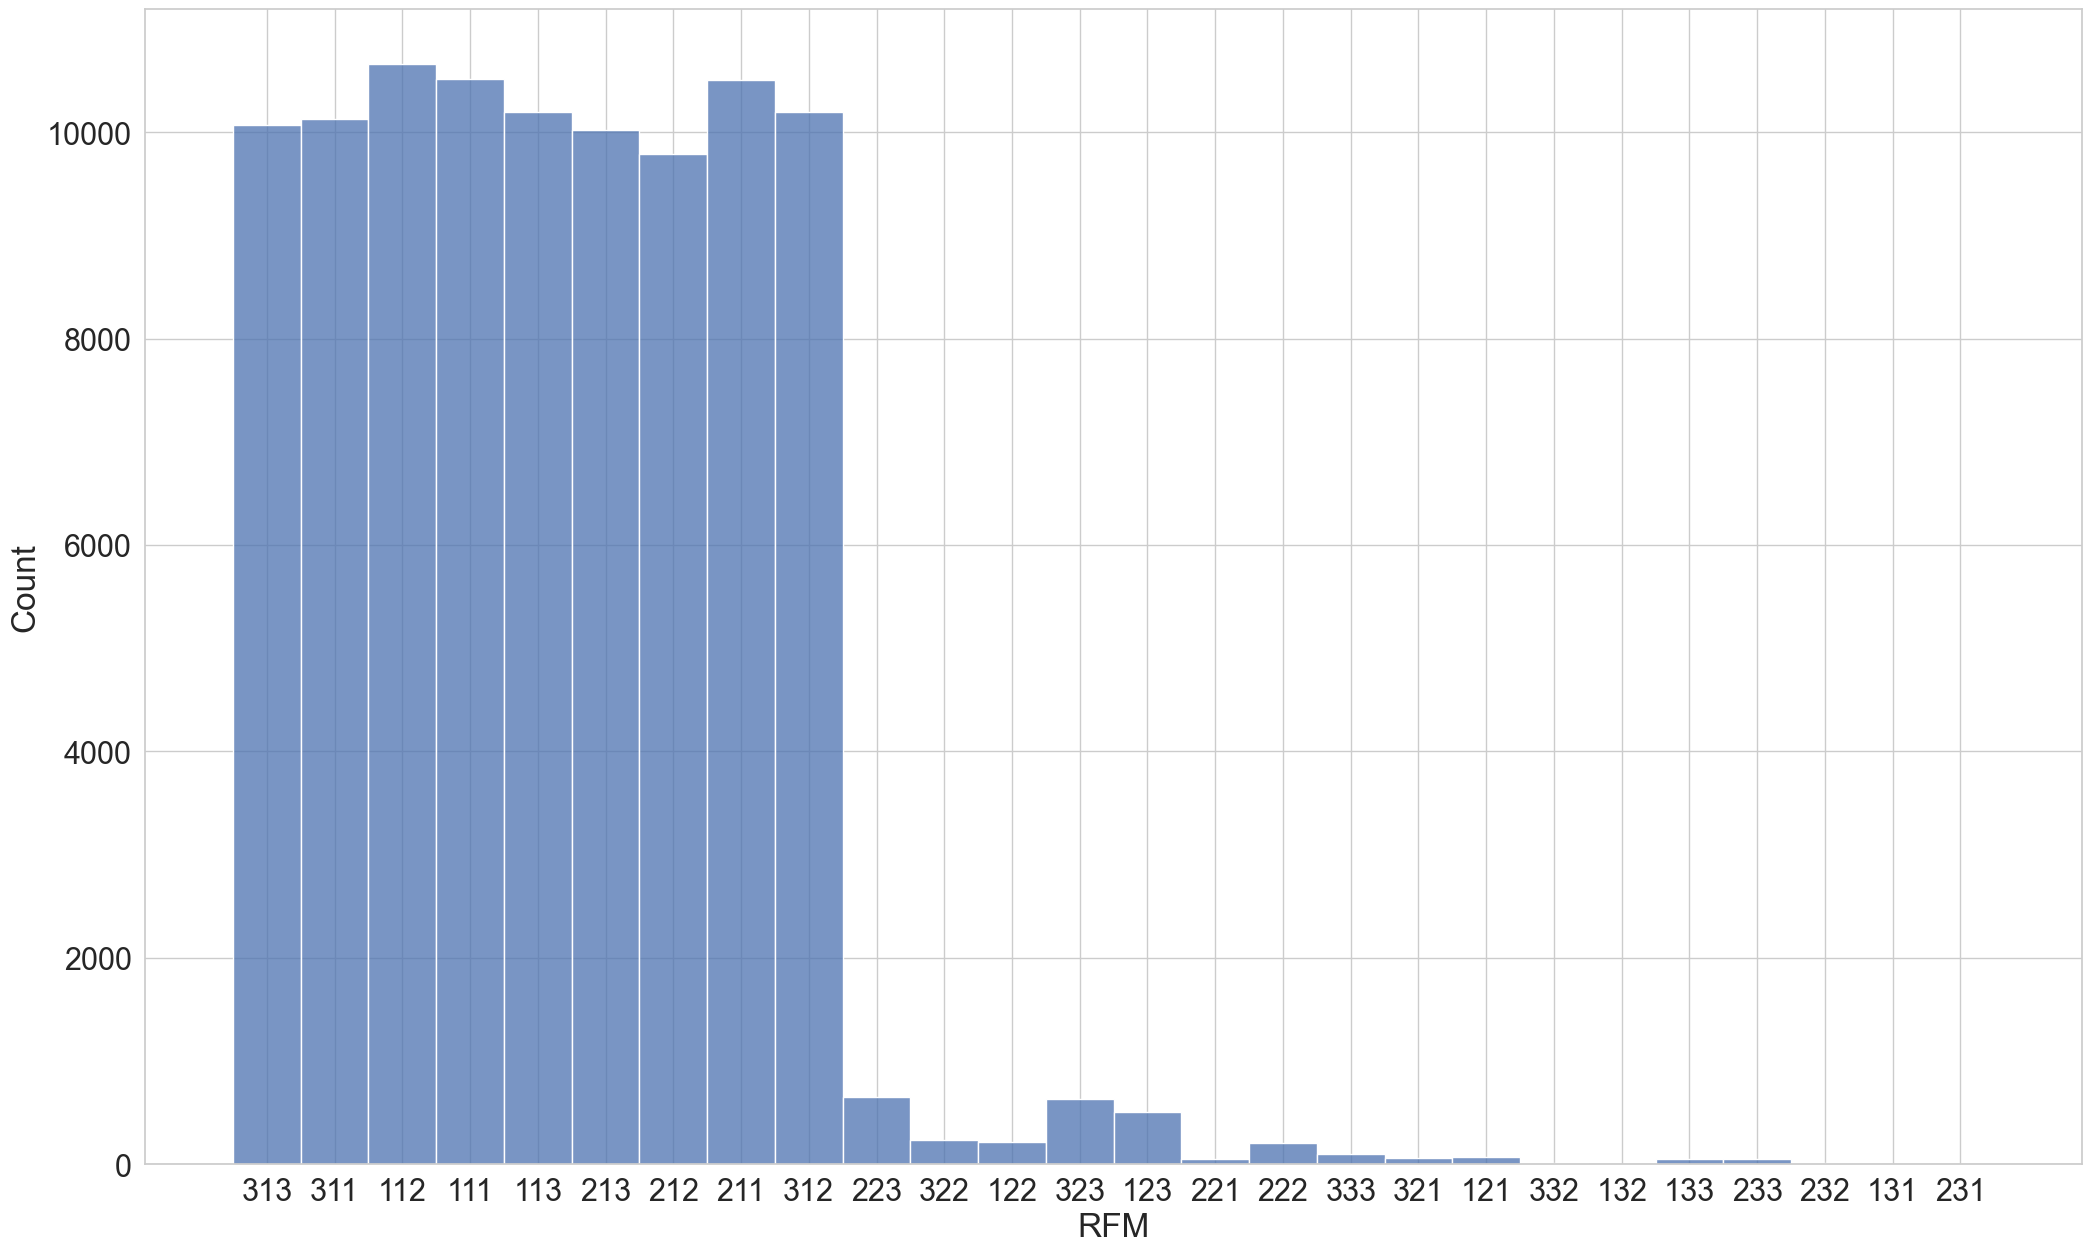

In [47]:
# Распределение RFM-сегментов
sns.histplot(df_for_task_6, x = 'RFM')

<Axes: xlabel='RFM', ylabel='M'>

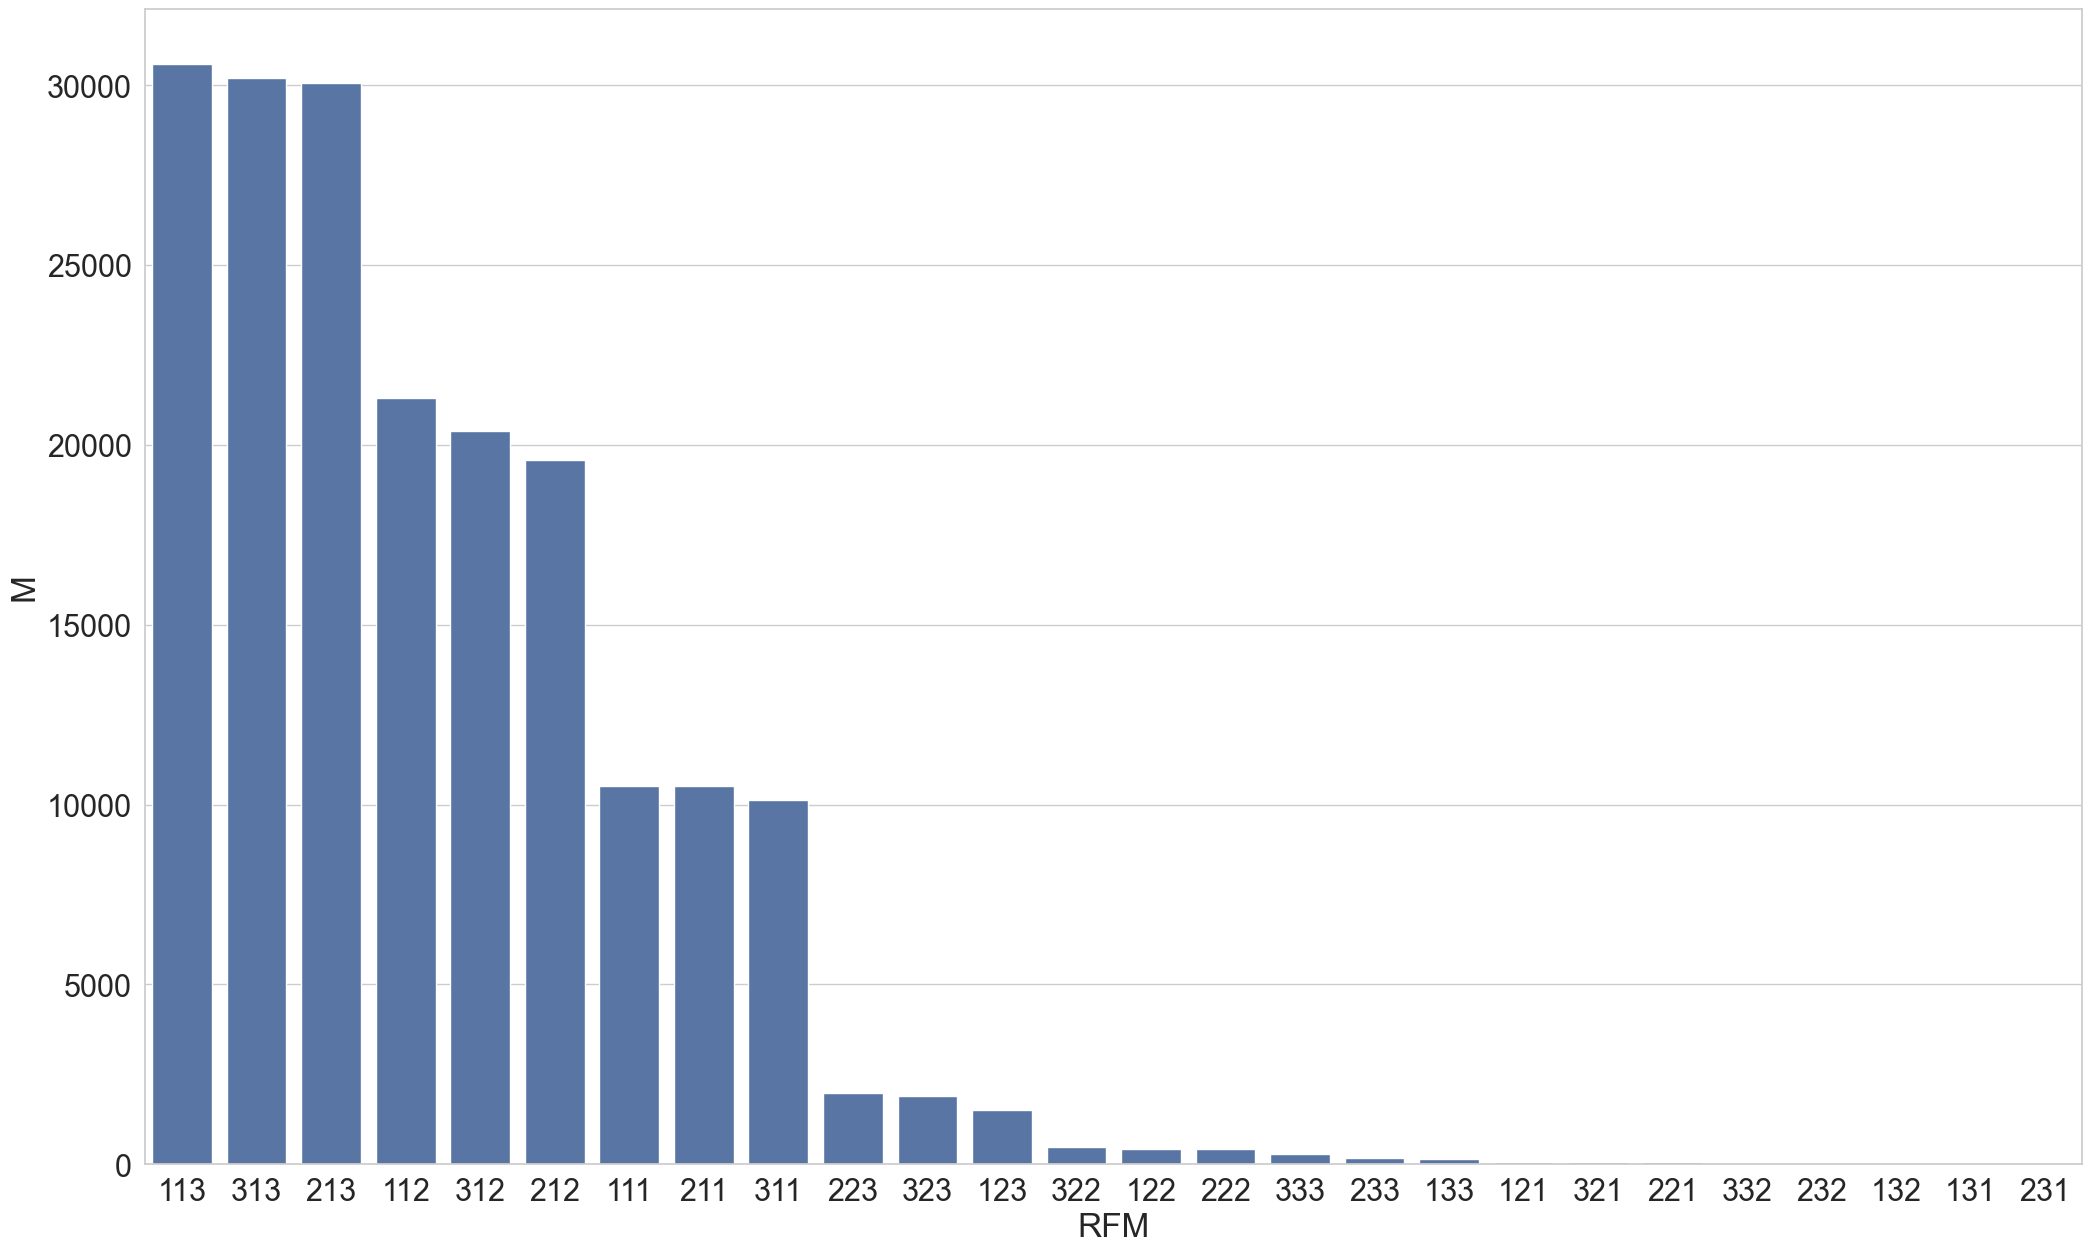

In [48]:
# Общий доход каждого сегмента
for_barplot = df_for_task_6.groupby('RFM', as_index = False).agg({'M': 'sum'}).sort_values('M', ascending = False)
sns.barplot(for_barplot, x = 'RFM', y = 'M')

<Axes: xlabel='RFM', ylabel='F'>

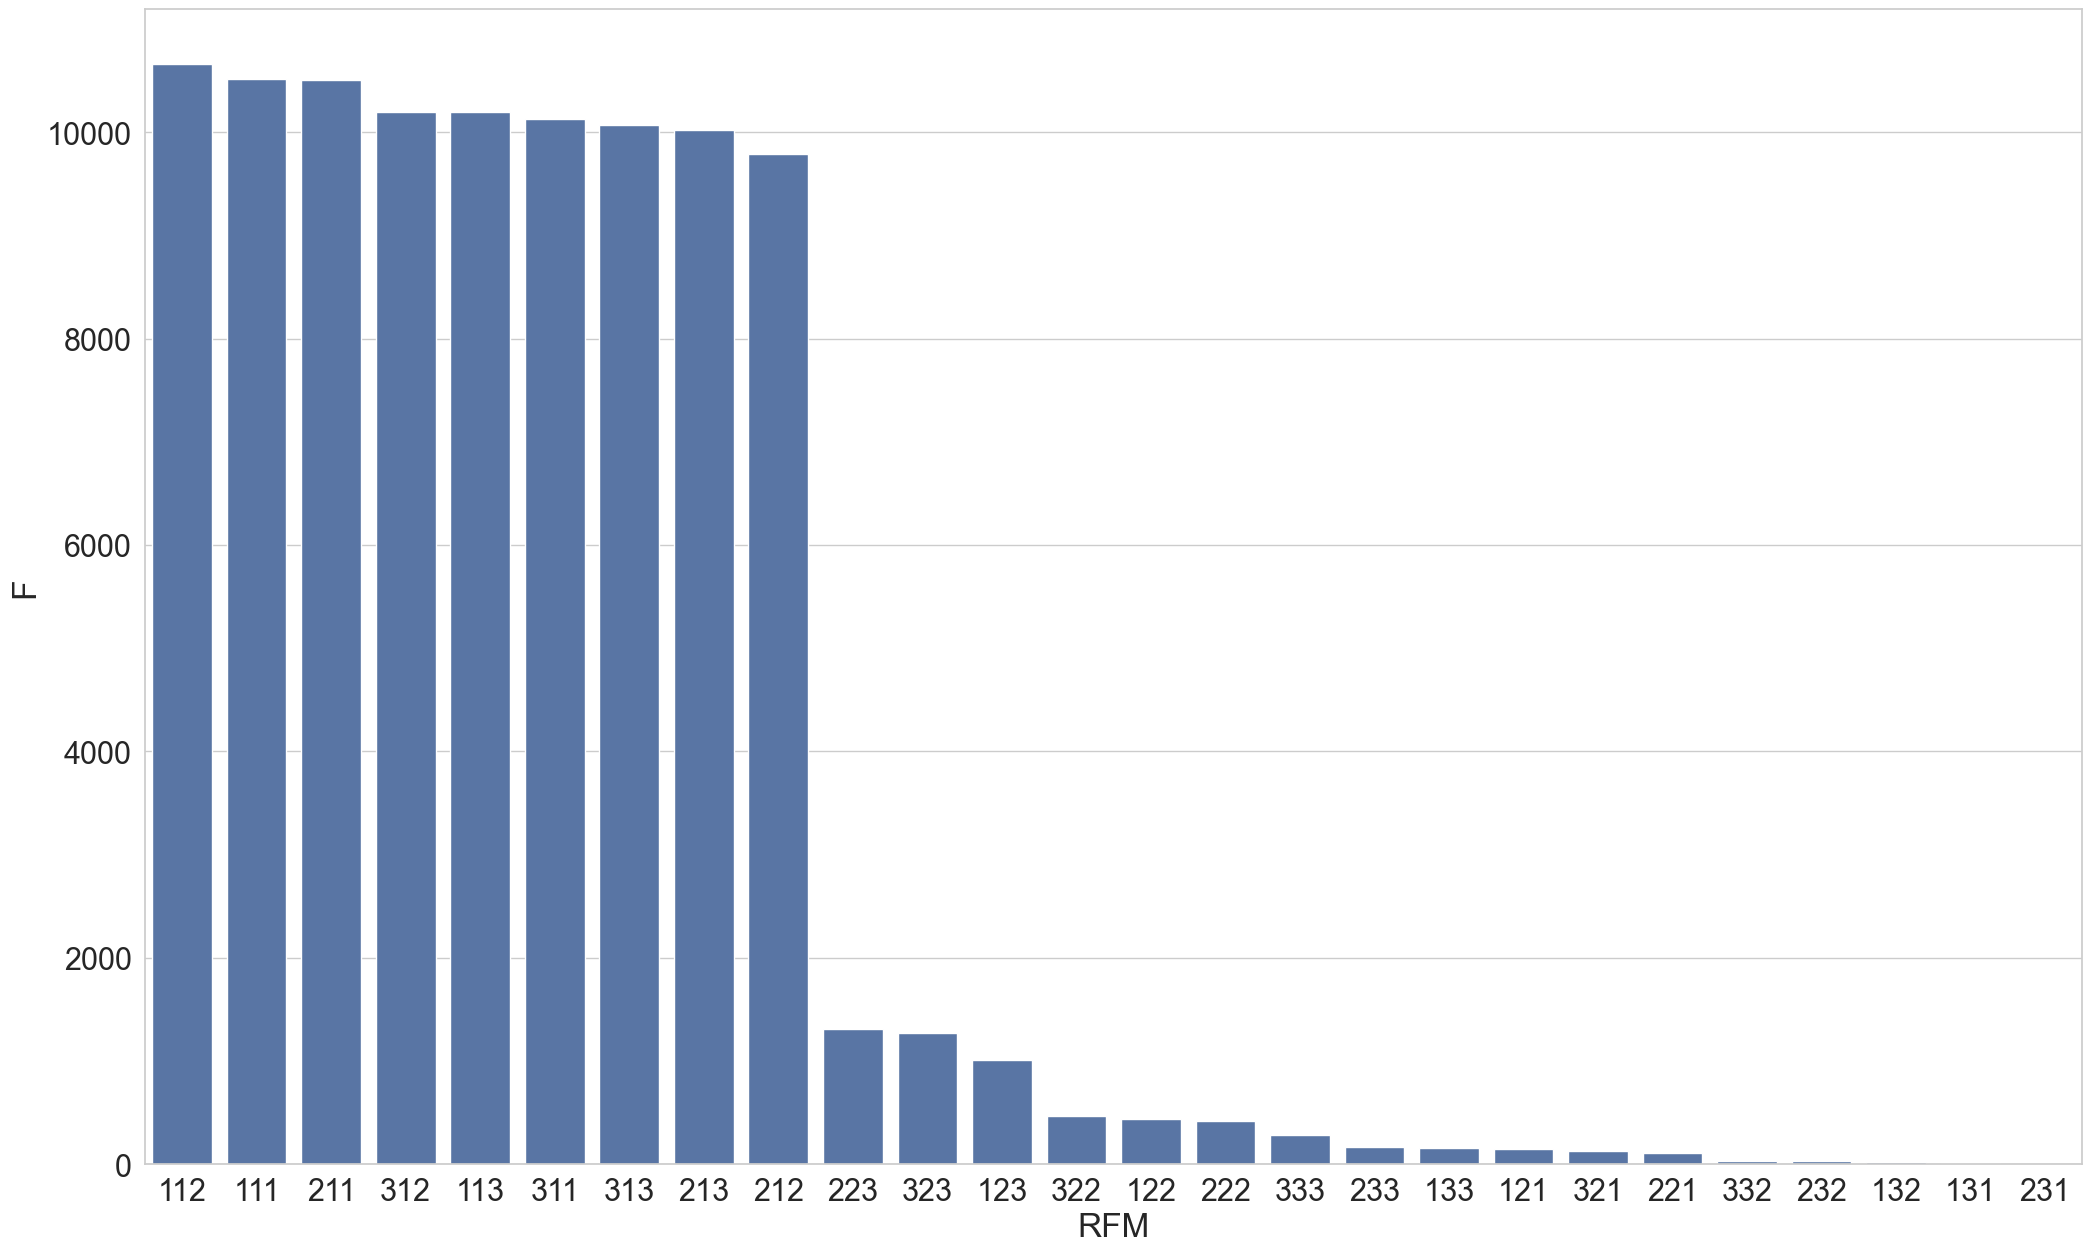

In [49]:
# Общее кол-во проданных товаров каждого сегмента
for_barplot = df_for_task_6.groupby('RFM', as_index = False).agg({'F': 'sum'}).sort_values('F', ascending = False)
sns.barplot(for_barplot, x = 'RFM', y = 'F')

<Axes: xlabel='RFM', ylabel='R'>

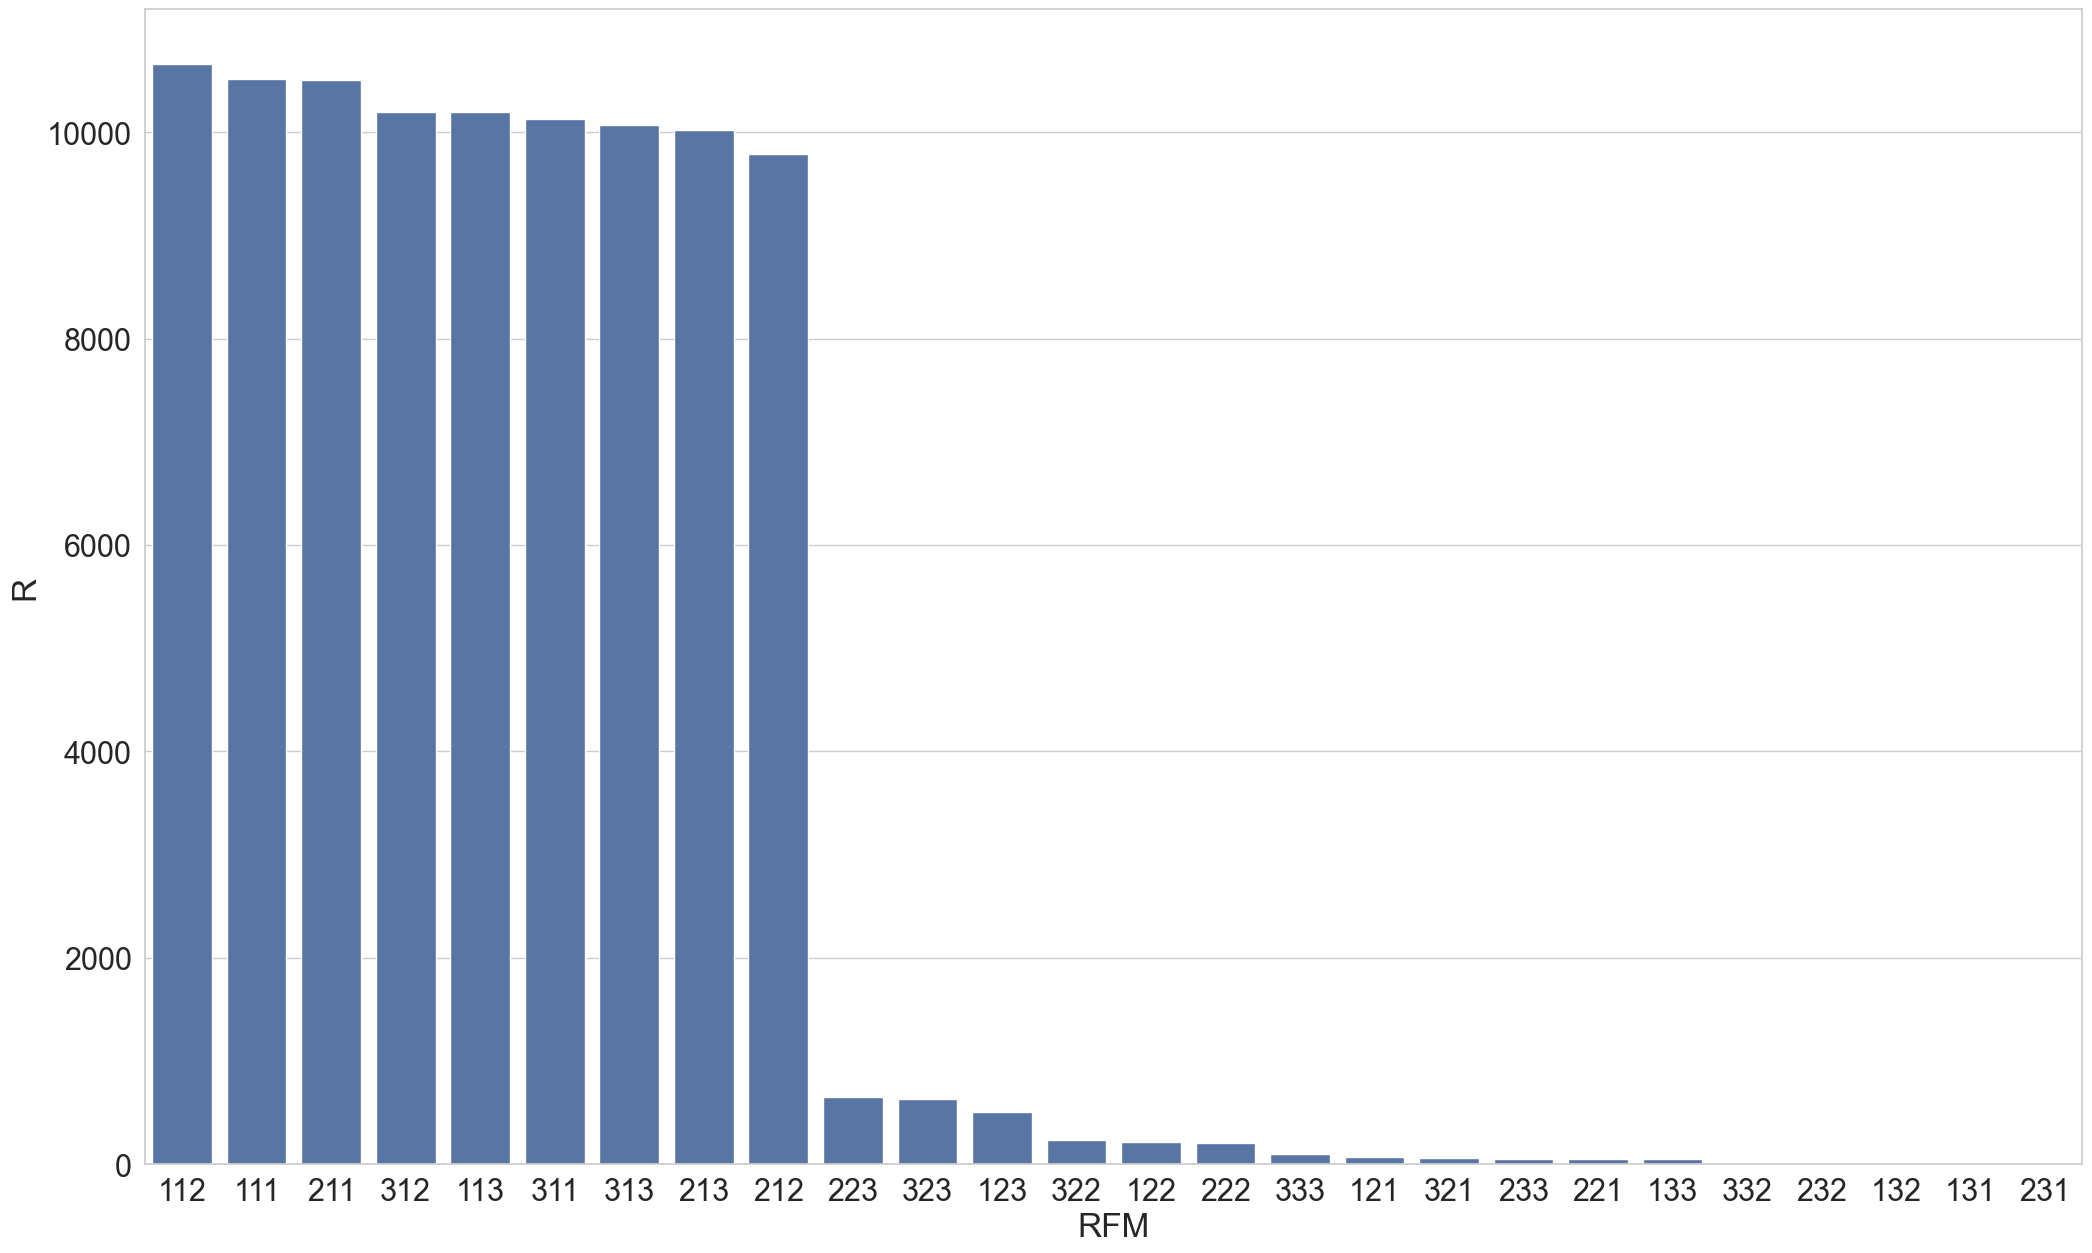

In [50]:
# Общее кол-во пользователей по давности последнего заказа каждого сегмента
for_barplot = df_for_task_6.groupby('RFM', as_index = False).agg({'R': 'count'}).sort_values('R', ascending = False)
sns.barplot(for_barplot, x = 'RFM', y = 'R')

Вывод: 

Самая главная проблема всего приложения - это удержание клиентов. Мы это видели и в когортном анализе, и на графиках выше. Очень большое количество пользователей из кластера, где F = 1 (Клиент сделал только один заказ за всё время.) Необходимо проработать стратегию по удержанию клиентов.